### Week 1 - 16 June 2025

# 1. Introduction and Project Description
This project aims to build a forecasting tool that helps estimate river water pollutant levels. The predictions can support environmental agencies in taking timely action and developing sustainable water quality policies.

**Objectives:**
- Predict water safety or potability by forecasting multiple pollutant levels.
- Use historical station-wise data to train a robust model.
- Estimate overall pollution level and safety based on predicted pollutants.

# 2. Dataset Loading and Preprocessing
In this section, we load the raw dataset and perform basic preprocessing steps:
- Handle missing values
- Rename columns and clean unit notations
- Parse dates and extract time-related features

In [4]:
# To install necessary libraries (uncomment if running in a new environment)
# pip install pandas numpy matplotlib seaborn scikit-learn

In [5]:
## Data Preparation

# Import necessary libraries

import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations - Linear Algebra

# Scikit-learn tools for modeling and evaluation
# Wrap regressor to handle multiple target outputs
from sklearn.multioutput import MultiOutputRegressor
# Initialize the RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
# Initialize the XGBoostRegressor model
from xgboost import XGBRegressor
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score

# Optional: Set display options for better readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 3. Exploratory Data Analysis (EDA)
Here, we explore the dataset visually and statistically:
- Distribution of pollutant levels
- Correlation analysis
- Temporal and spatial variation in pollution levels
- Identification of outliers

In [6]:
# Load the dataset
# Load data from CSV file with semicolon as separator
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')

# Preview first few rows
# Display the first few rows of the dataset
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.33,2.77,12.00,12.30,9.50,0.06,154.00,0.45,289.50
1,1,11.05.2000,0.04,3.00,51.60,14.61,17.75,0.03,352.00,0.09,1792.00
2,1,11.09.2000,0.03,2.10,24.50,9.87,13.80,0.17,416.00,0.20,2509.00
3,1,13.12.2000,0.17,2.23,35.60,12.40,17.13,0.10,275.20,0.38,1264.00
4,1,02.03.2001,0.00,3.03,48.80,14.69,10.00,0.07,281.60,0.13,1462.00


In [7]:
# Data Overview

# General info
print("Data Info:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
df.describe().T

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
id,2861.00,12.40,6.08,1.00,8.00,14.00,16.00,22.00
NH4,2858.00,0.76,2.49,0.00,0.08,0.22,0.50,39.43
BSK5,2860.00,4.32,2.97,0.00,2.16,3.80,5.80,50.90
Suspended,2845.00,12.93,16.54,0.00,6.00,10.00,15.00,595.00
O2,2858.00,9.51,4.43,0.00,7.09,9.00,11.52,90.00
NO3,2860.00,4.32,6.88,0.00,1.39,2.80,5.58,133.40
NO2,2858.00,0.25,2.18,0.00,0.03,0.06,0.13,109.00
SO4,2812.00,59.36,96.58,0.00,27.05,37.80,64.64,3573.40
PO4,2833.00,0.42,0.77,0.00,0.13,0.27,0.47,13.88
CL,2812.00,93.73,394.51,0.02,26.80,33.90,45.61,5615.28


## 📊 Exploratory Data Analysis (EDA)

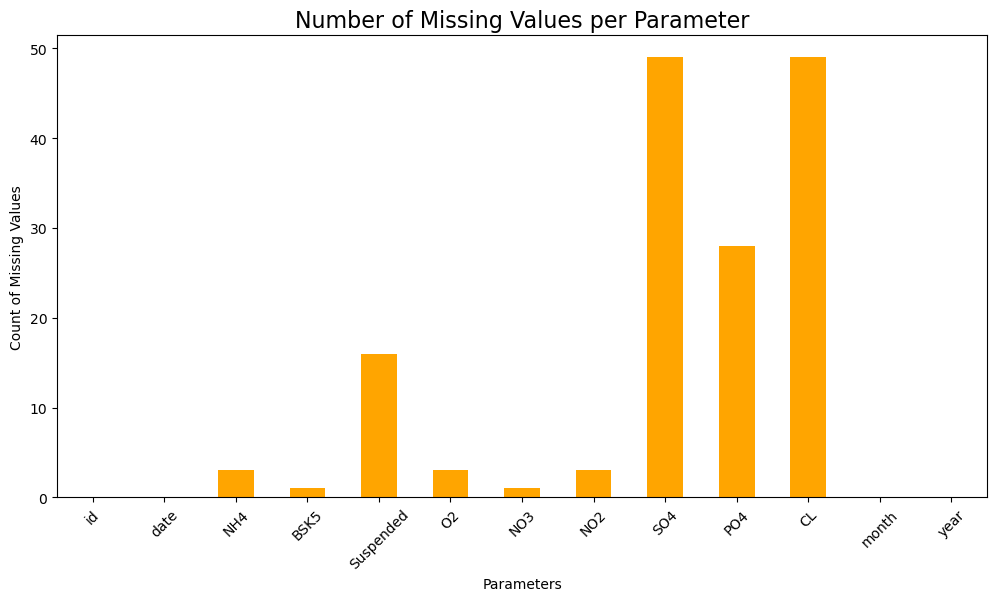

In [8]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

params = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

# Ensure datetime format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

missing_counts = df.isnull().sum()

plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar', color='orange')
plt.title('Number of Missing Values per Parameter', fontsize=16)
plt.xlabel('Parameters')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()

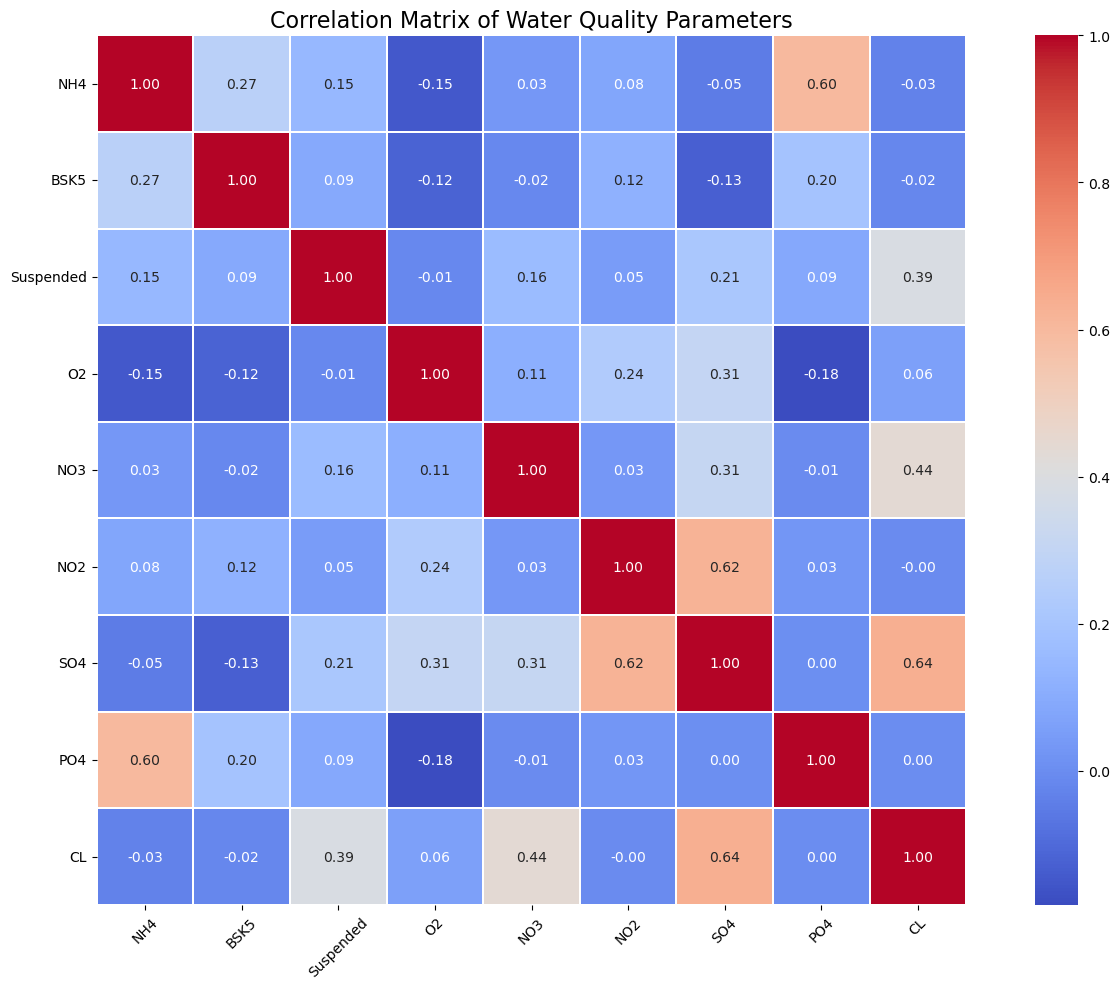

In [9]:

# Correlation matrix
plt.figure(figsize=(14, 10))
corr_matrix = df[params].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.3, linecolor='white', square=True)
plt.title("Correlation Matrix of Water Quality Parameters", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

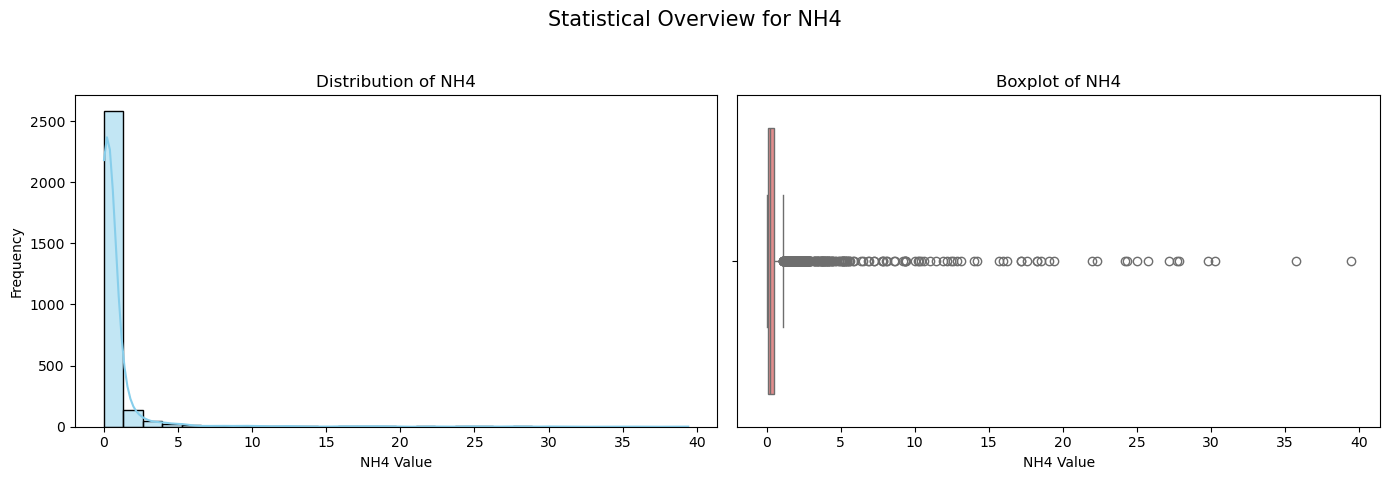

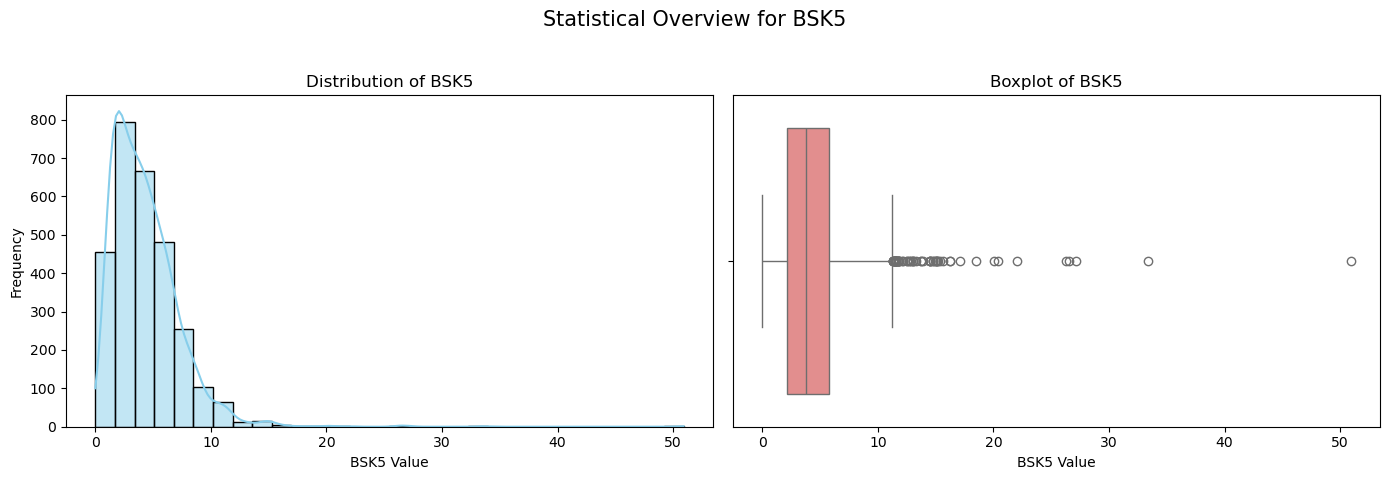

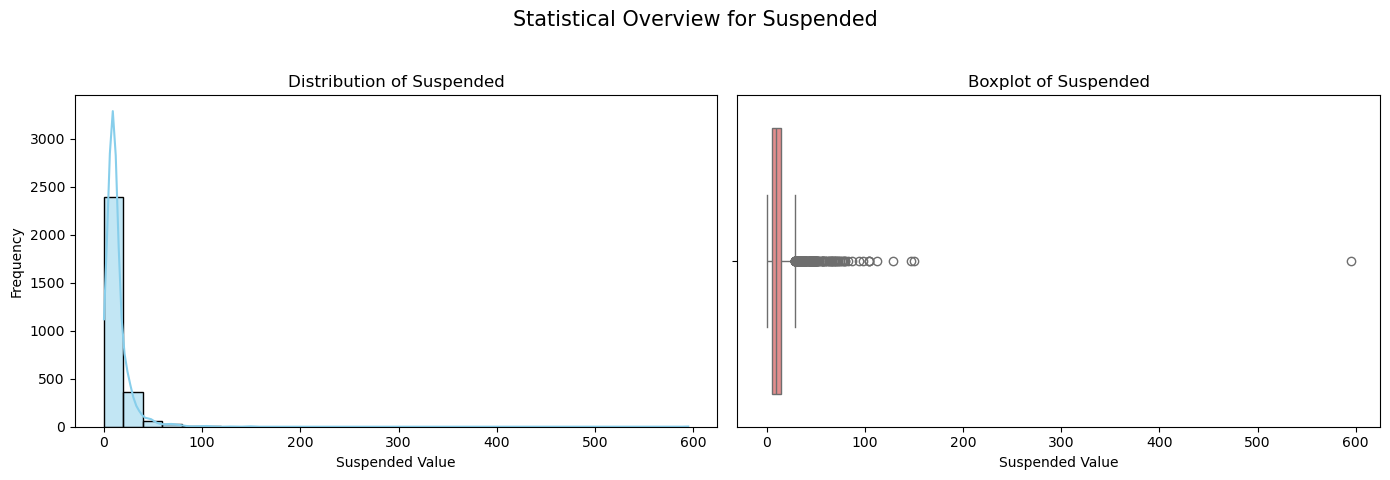

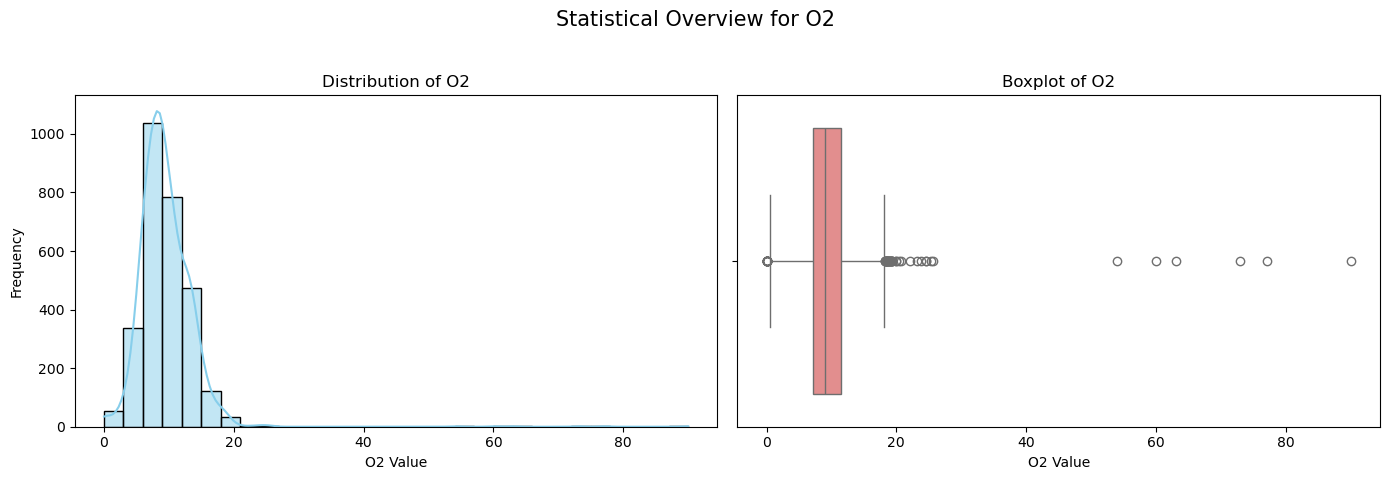

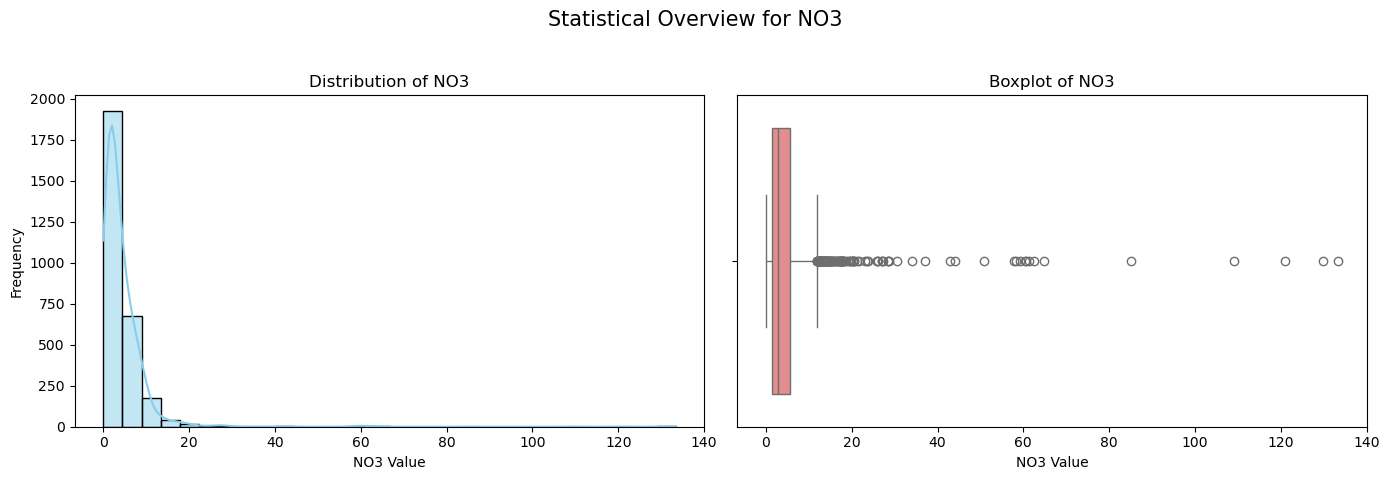

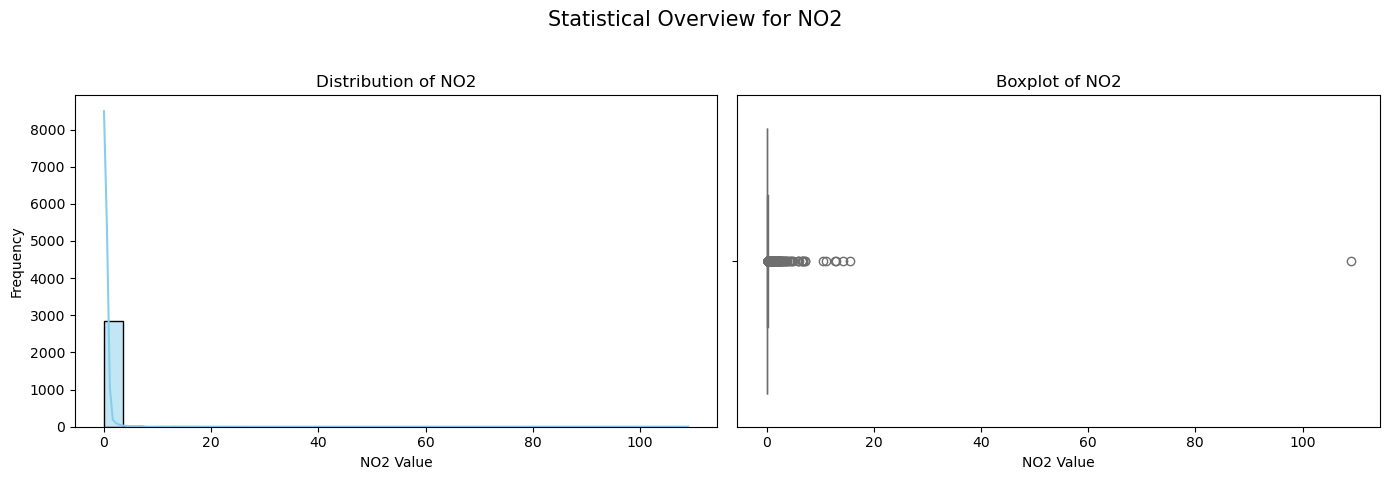

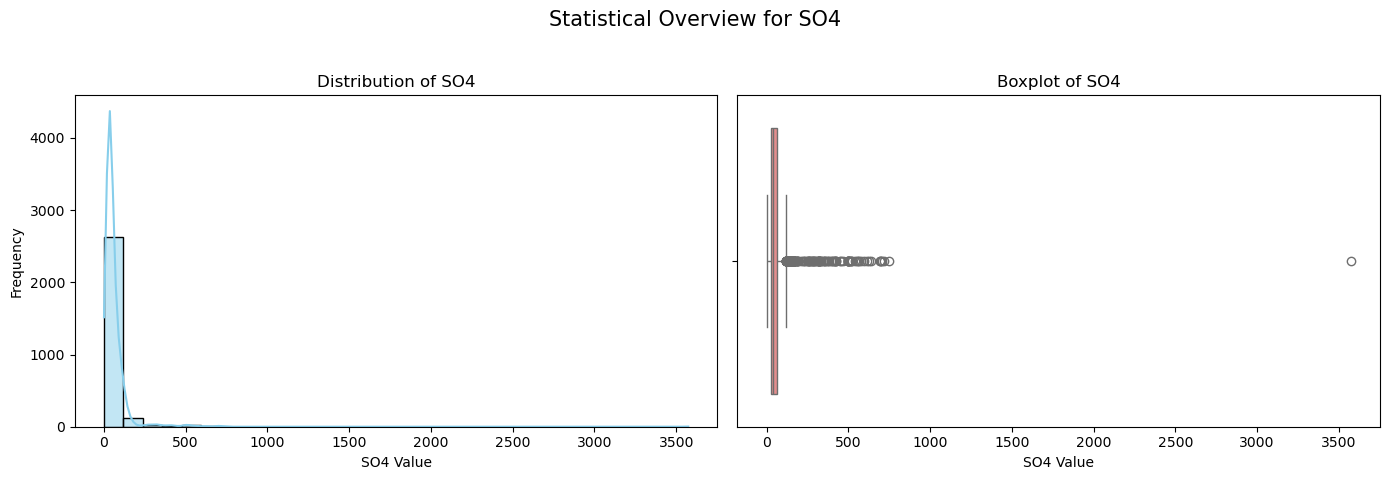

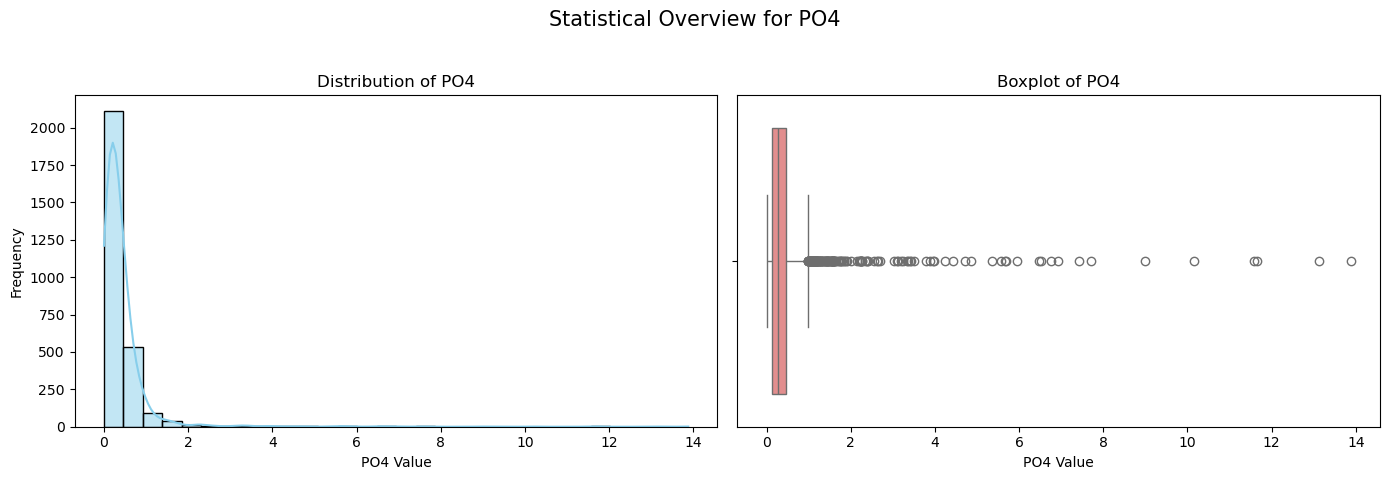

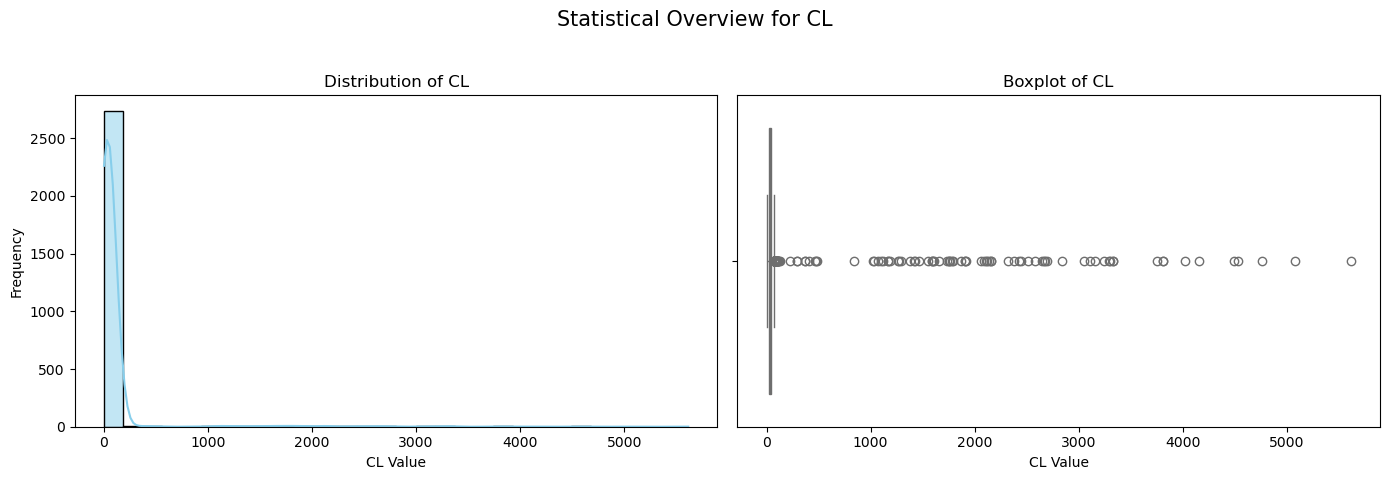

In [10]:

# Distributions and boxplots
for col in params:
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df[col], kde=True, ax=axs[0], color='skyblue', bins=30)
    axs[0].set_title(f"Distribution of {col}")
    axs[0].set_xlabel(f"{col} Value")
    axs[0].set_ylabel("Frequency")

    sns.boxplot(x=df[col], ax=axs[1], color='lightcoral')
    axs[1].set_title(f"Boxplot of {col}")
    axs[1].set_xlabel(f"{col} Value")

    plt.suptitle(f"Statistical Overview for {col}", fontsize=15)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


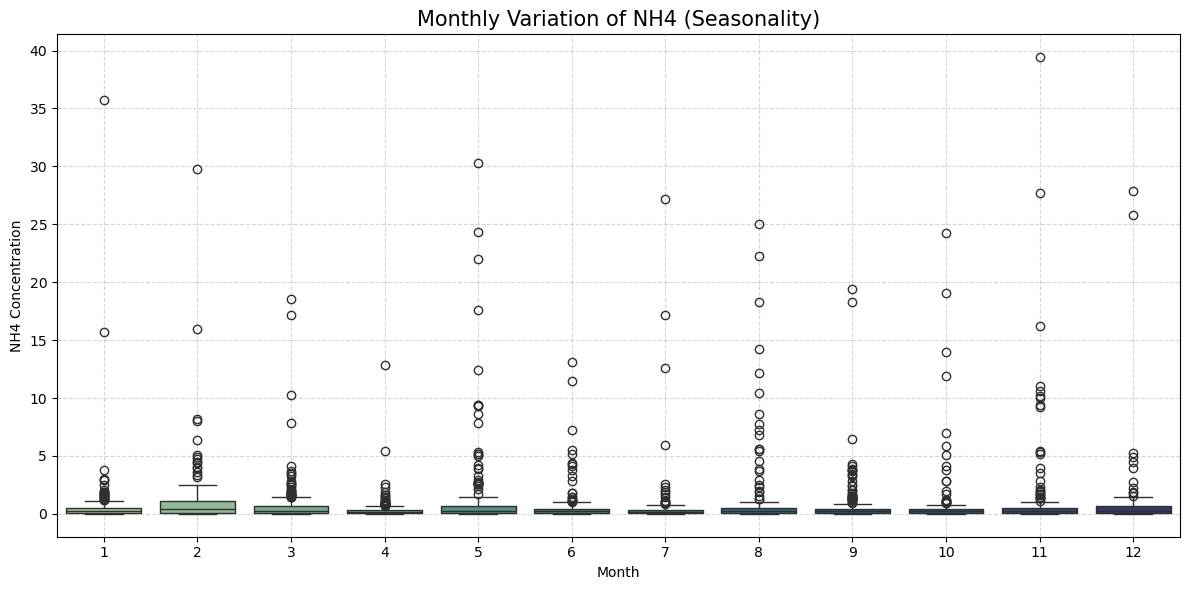

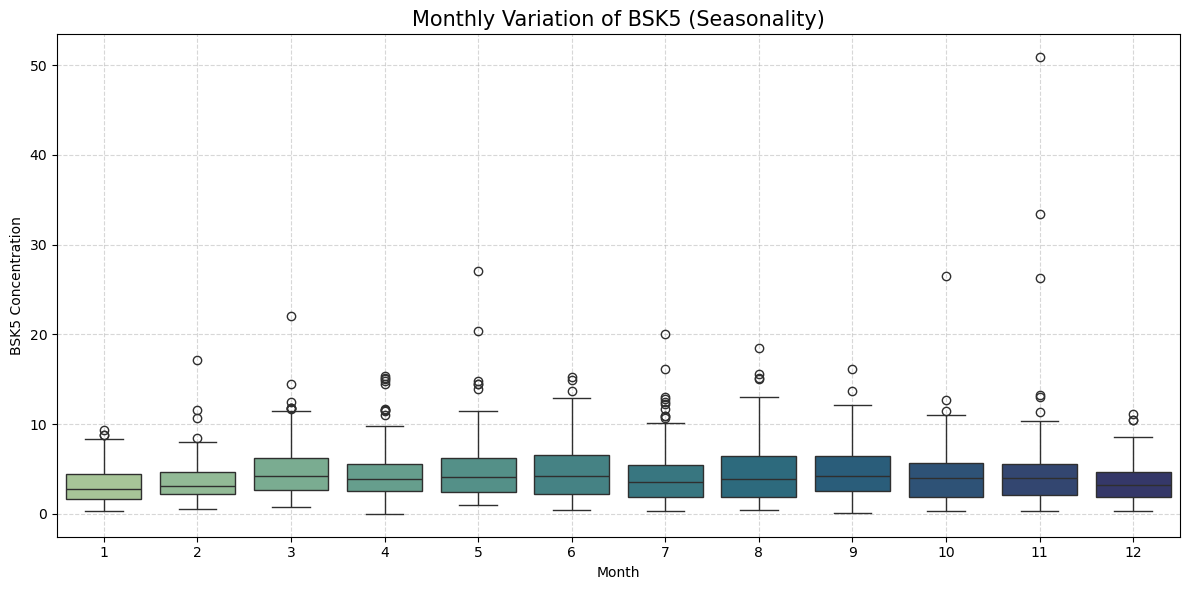

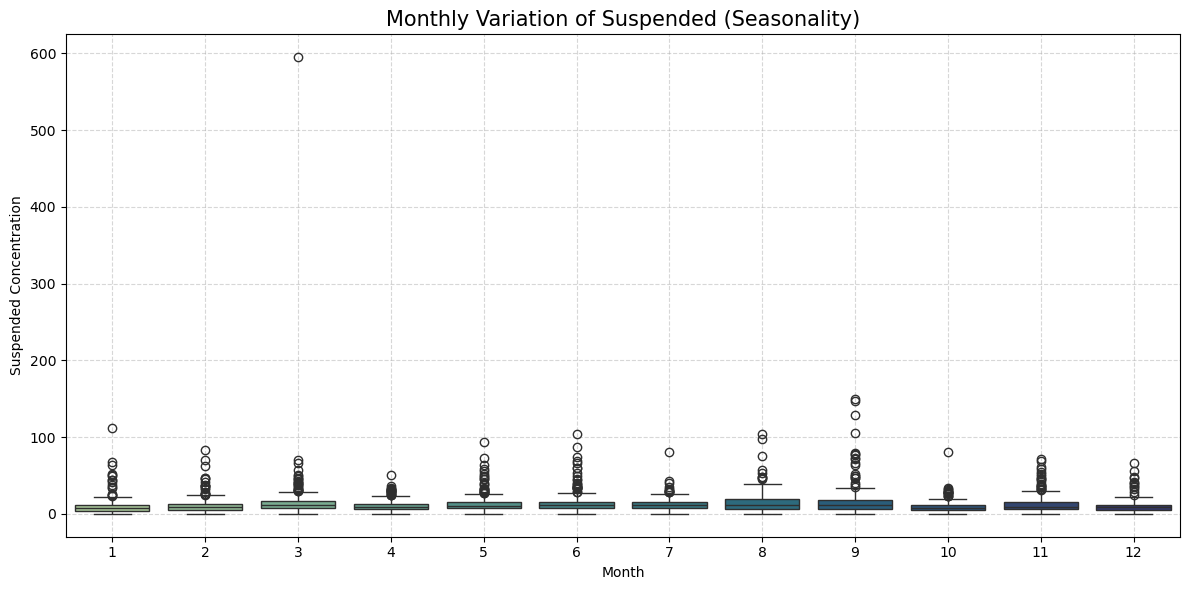

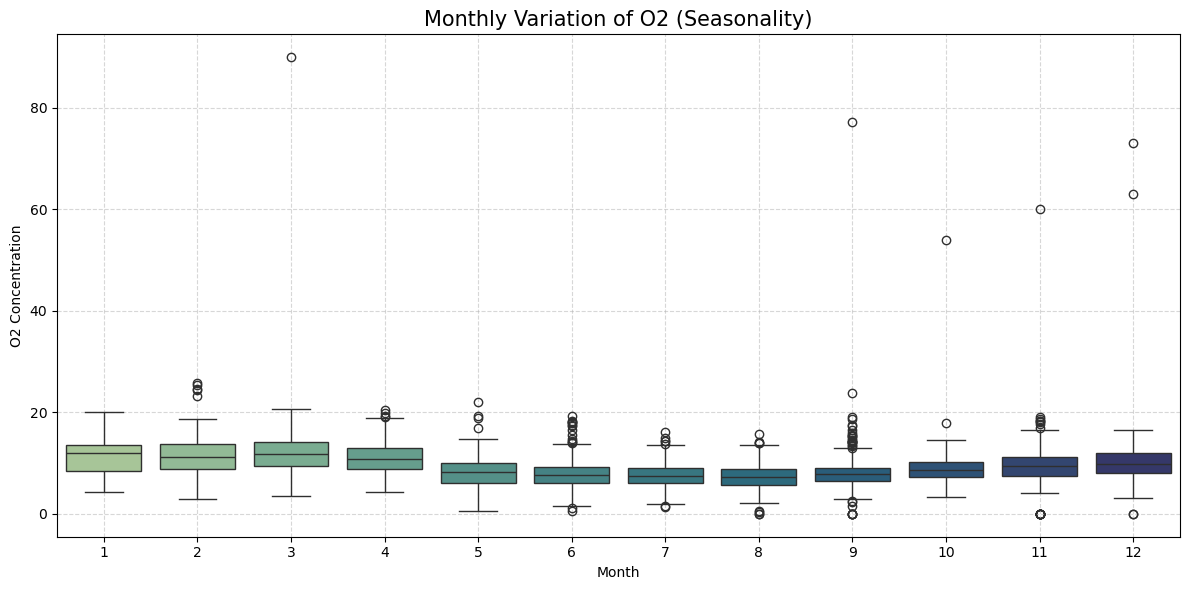

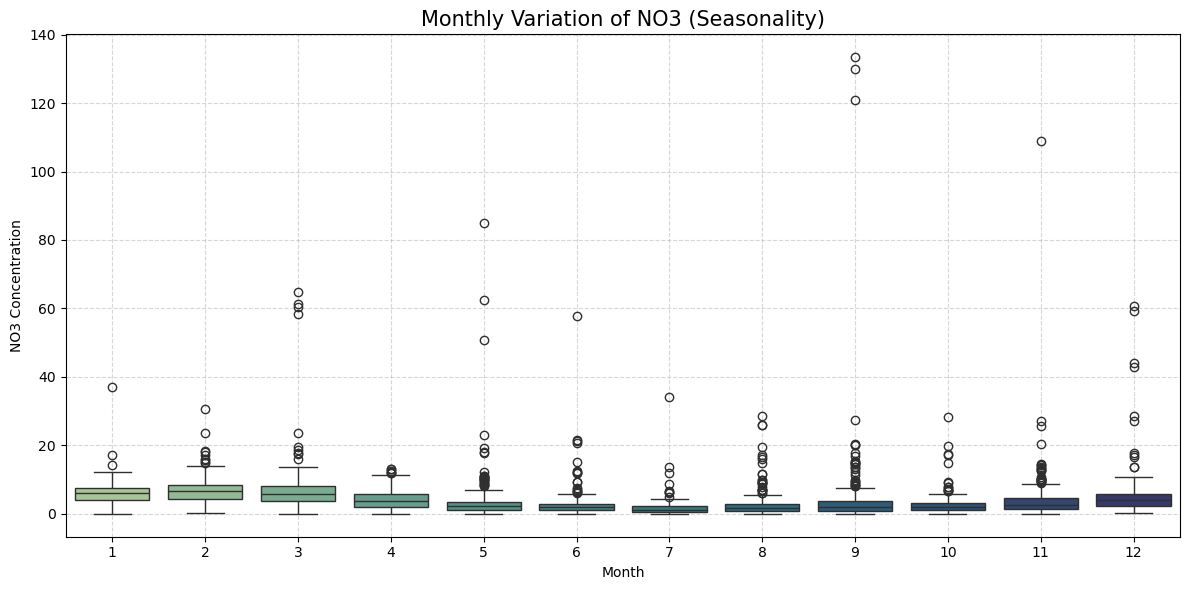

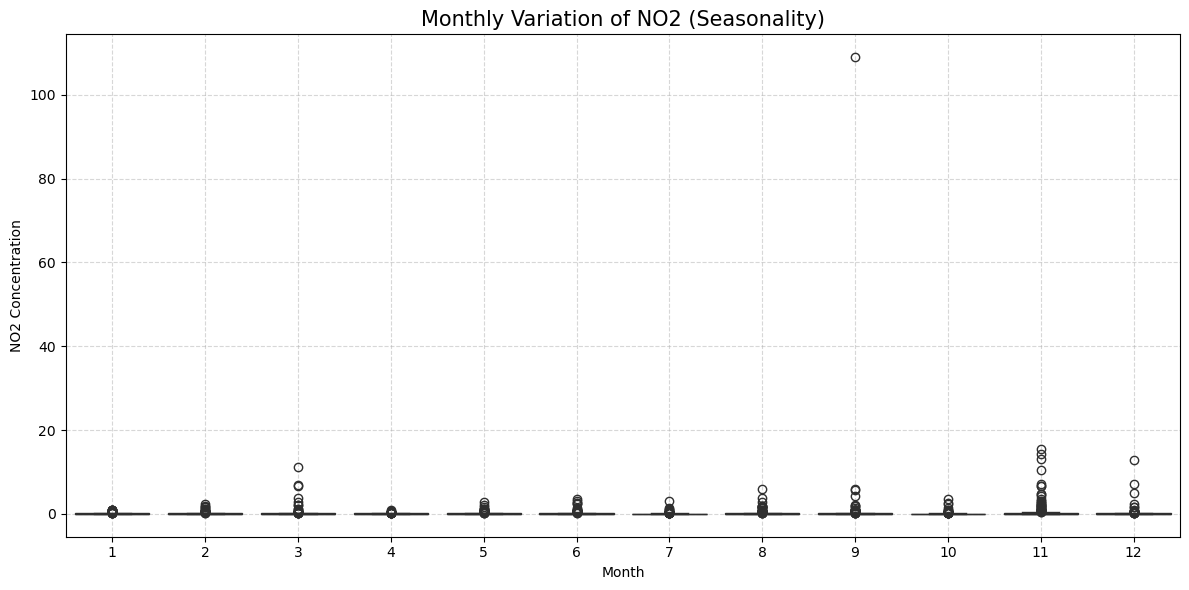

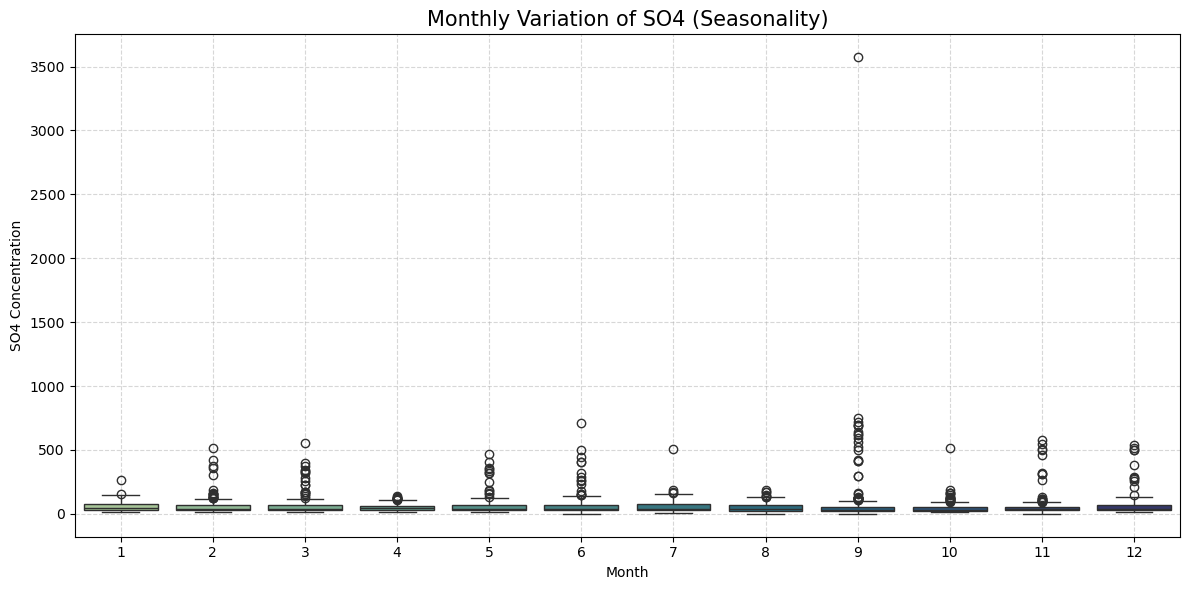

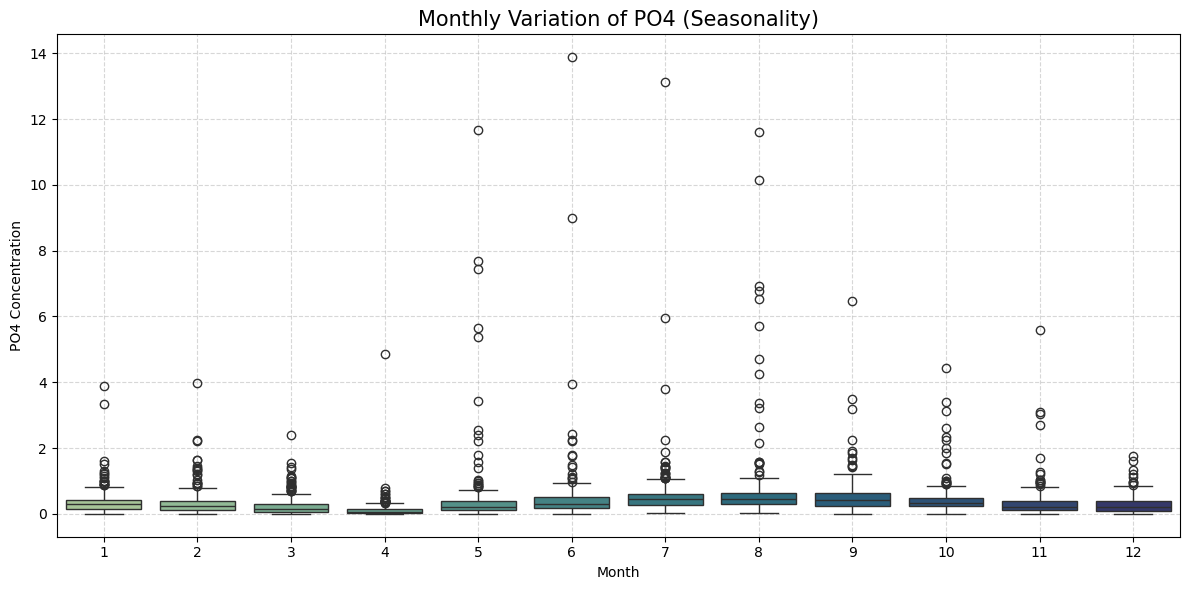

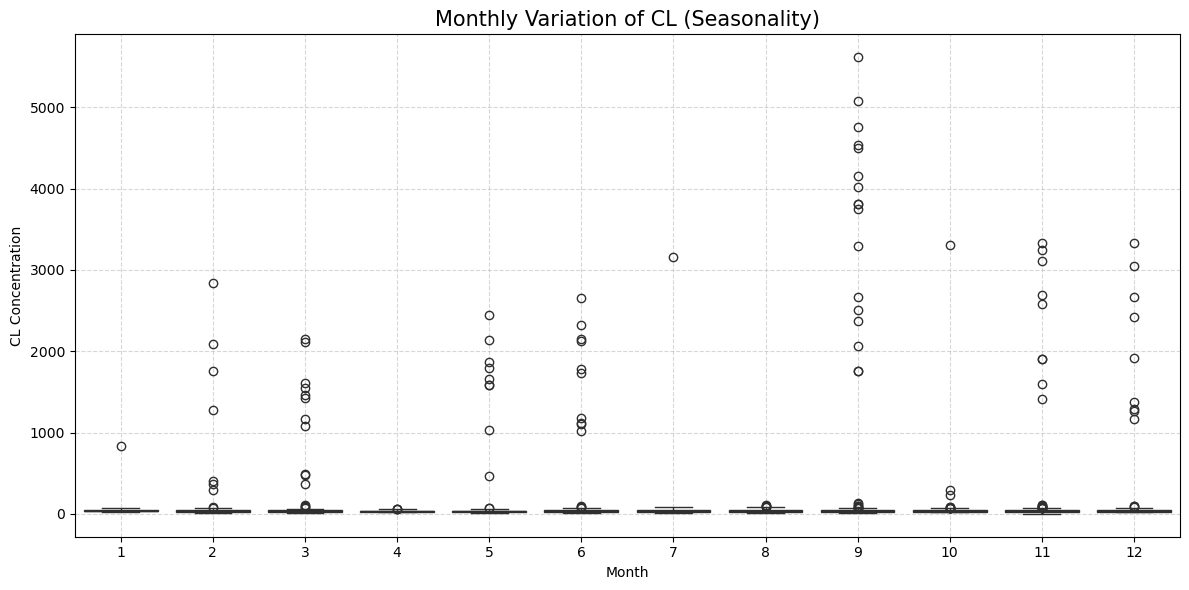

In [11]:

# Seasonal Boxplots by Month
for col in params:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='month', y=col, hue='month', data=df, palette="crest", legend=False)
    plt.title(f"Monthly Variation of {col} (Seasonality)", fontsize=15)
    plt.xlabel("Month")
    plt.ylabel(f"{col} Concentration")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

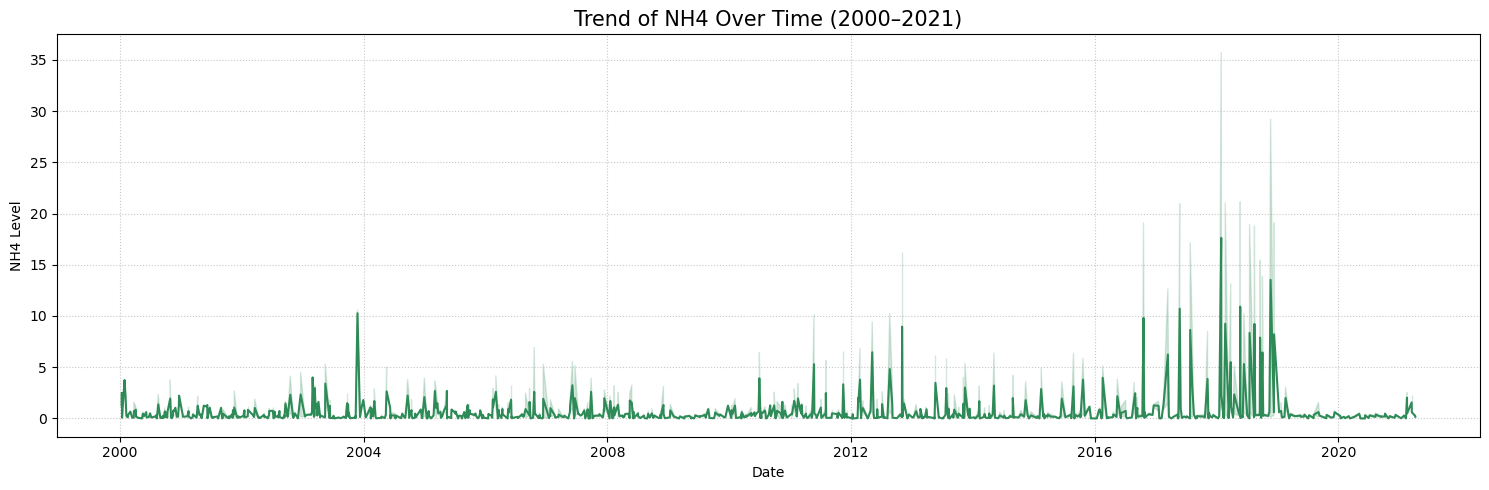

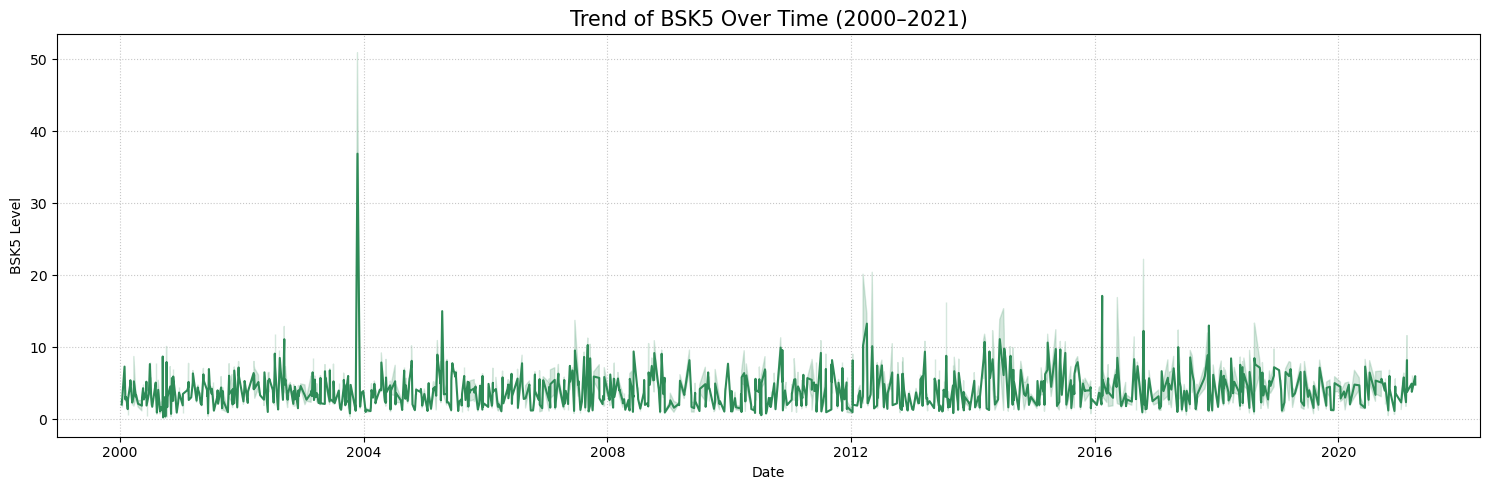

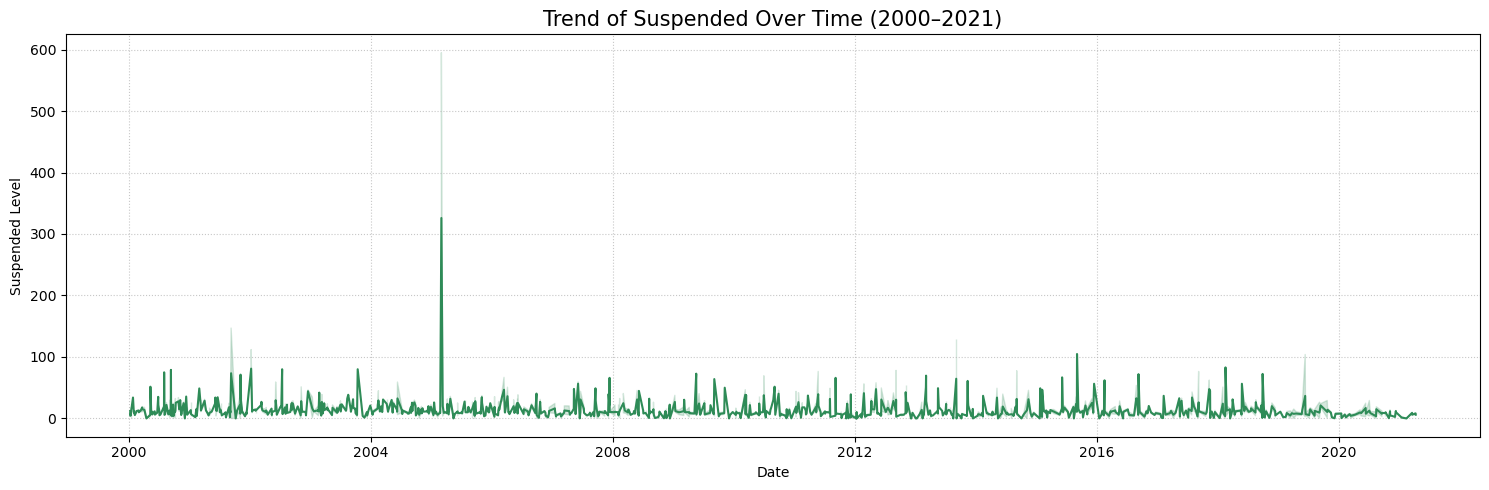

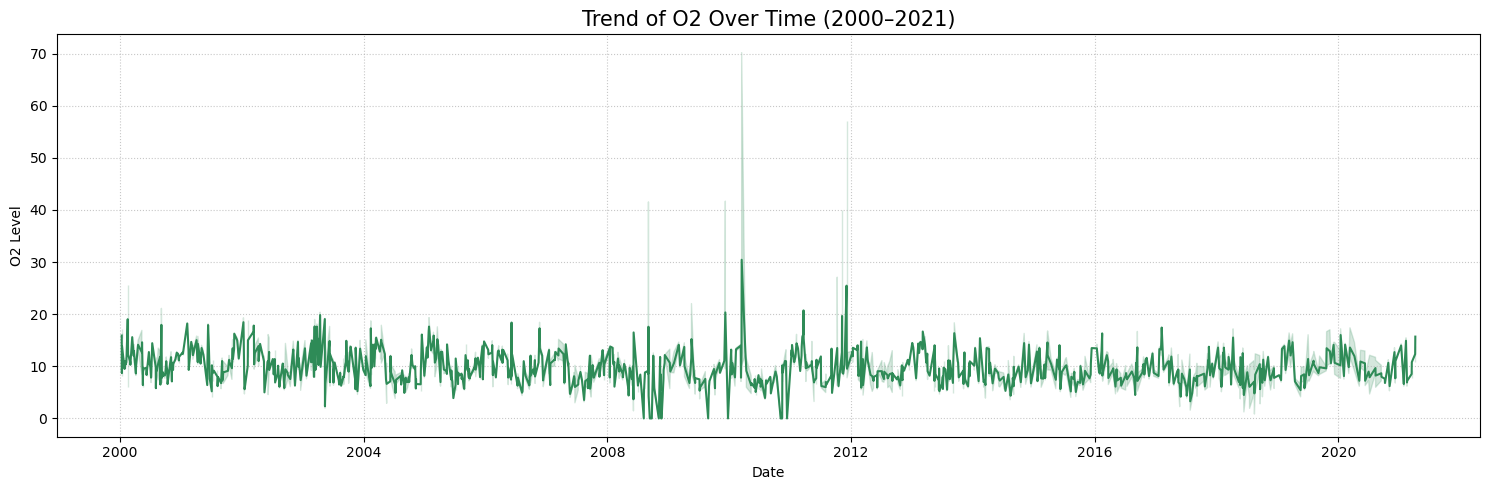

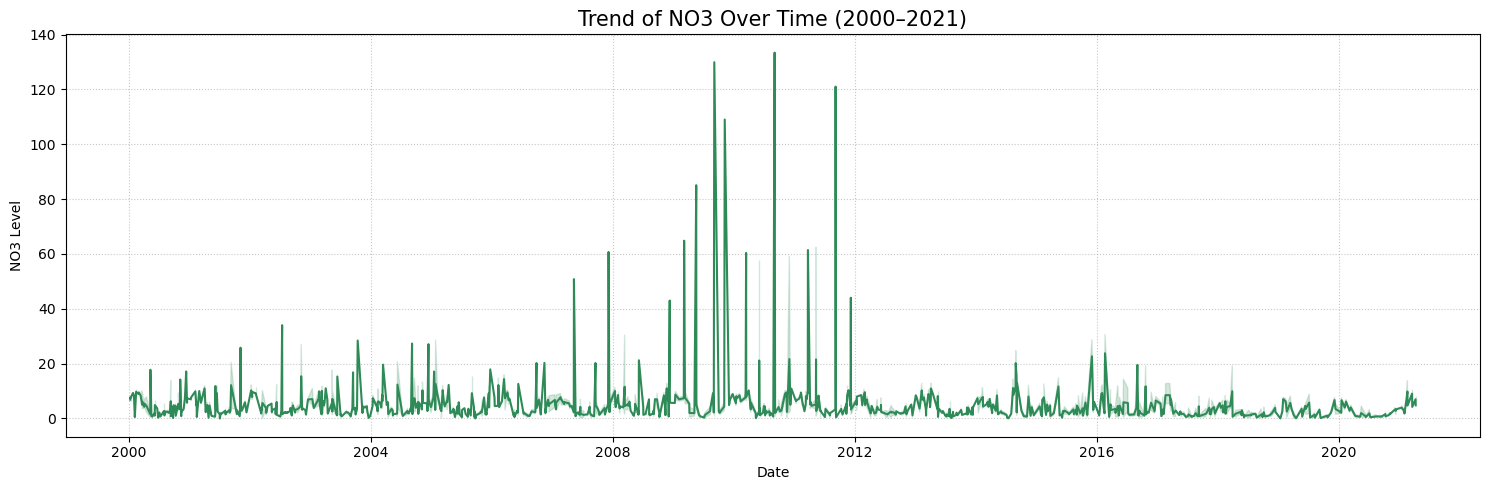

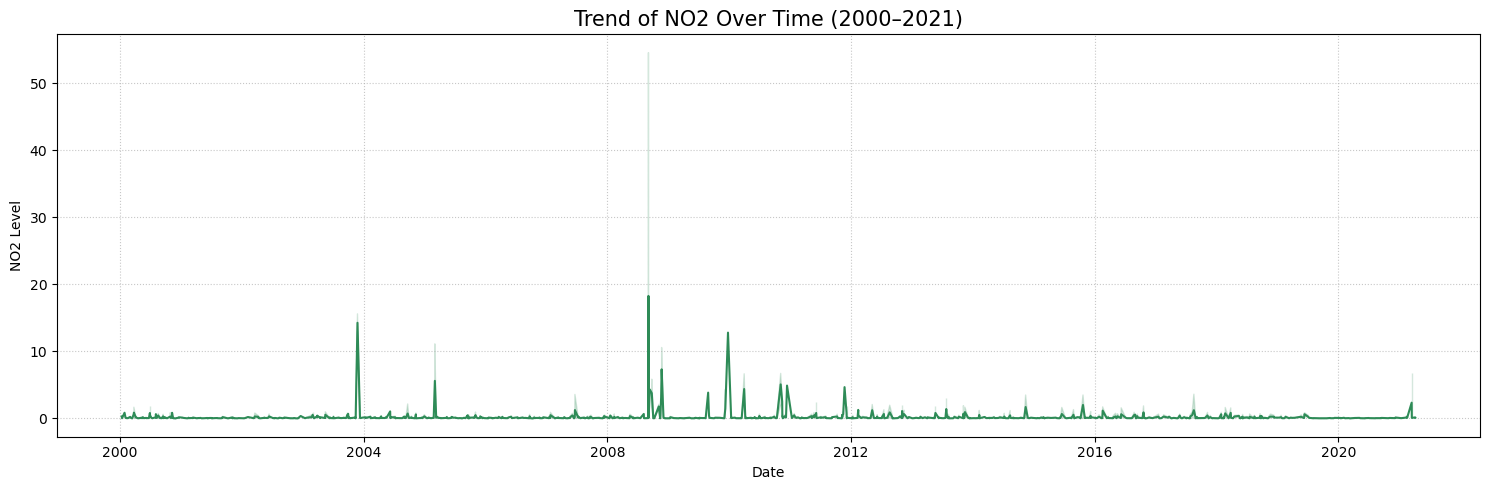

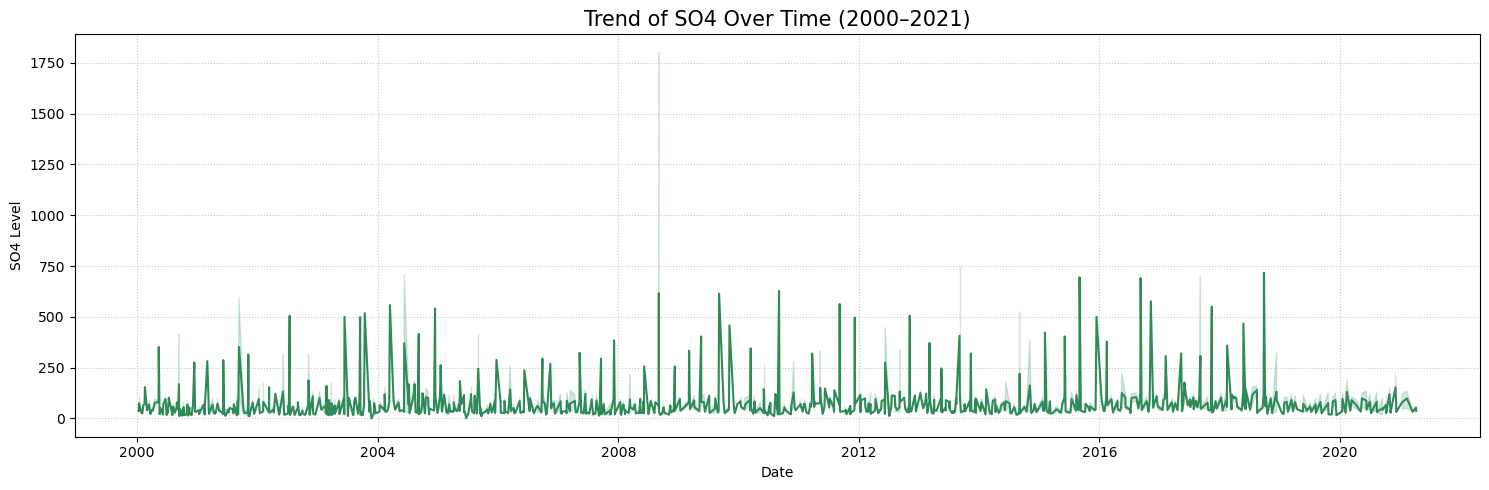

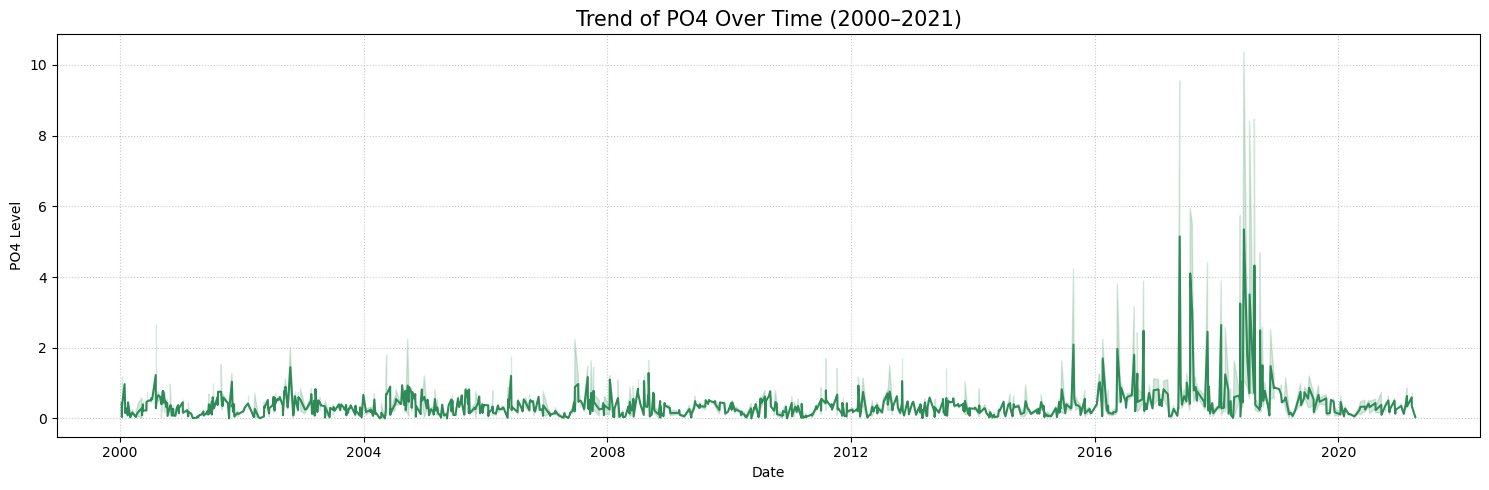

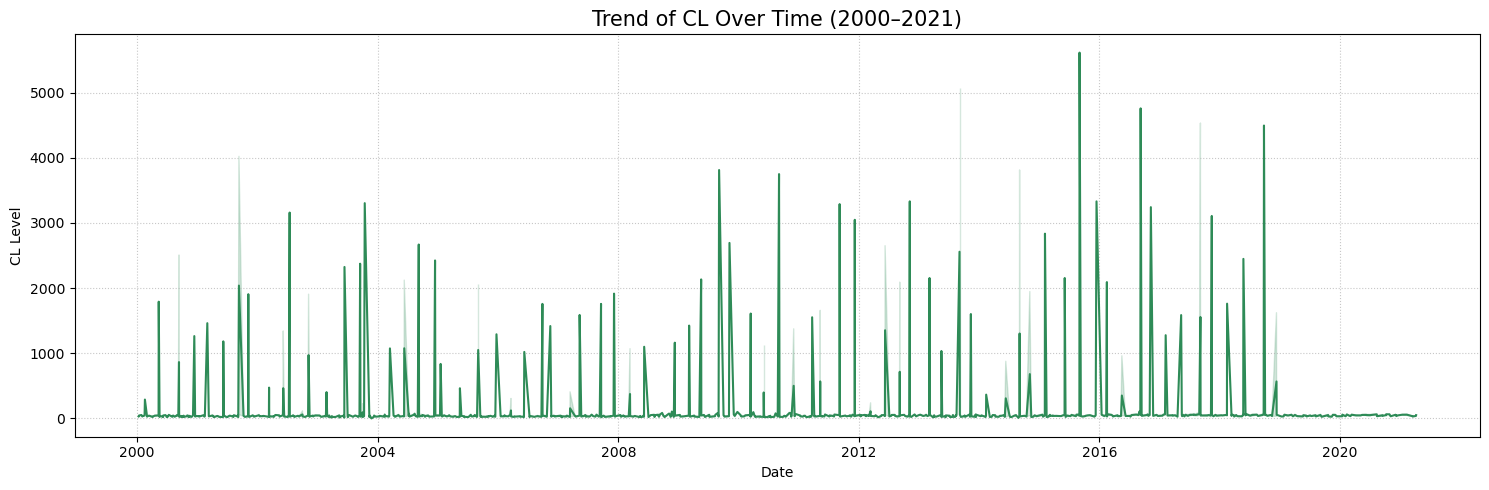

In [12]:
# Time Series Trends for Each Pollutant
for col in params:
    plt.figure(figsize=(15, 5))
    sns.lineplot(x='date', y=col, data=df.sort_values('date'), color='seagreen')
    plt.title(f"Trend of {col} Over Time (2000–2021)", fontsize=15)
    plt.xlabel("Date")
    plt.ylabel(f"{col} Level")
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 4. Feature Engineering
We extract meaningful features for model training:
- Year, month, and station information
- Encoding categorical data
- Selection of relevant features for model input

We add more context to the input features:
- Lag values (previous year/month levels)
- Rolling averages (3- or 6-month)
- Interaction features (e.g., month × station)
- Upstream/downstream indicator (if known)

In [13]:
## Preprocessing

# Check for missing values
print("\nMissing values per column:")
# Check for missing values in each column
print(df.isnull().sum())


Missing values per column:
id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
month         0
year          0
dtype: int64


In [14]:
# Dataset dimensions
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 2861 rows and 13 columns.


In [15]:
# Statistics of the data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,2861.00,12.40,1.00,8.00,14.00,16.00,22.00,6.08
date,2861,2010-05-02 22:53:33.701502976,2000-01-10 00:00:00,2005-03-10 00:00:00,2010-06-04 00:00:00,2015-08-11 00:00:00,2021-04-07 00:00:00,NaN
NH4,2858.00,0.76,0.00,0.08,0.22,0.50,39.43,2.49
BSK5,2860.00,4.32,0.00,2.16,3.80,5.80,50.90,2.97
Suspended,2845.00,12.93,0.00,6.00,10.00,15.00,595.00,16.54
O2,2858.00,9.51,0.00,7.09,9.00,11.52,90.00,4.43
NO3,2860.00,4.32,0.00,1.39,2.80,5.58,133.40,6.88
NO2,2858.00,0.25,0.00,0.03,0.06,0.13,109.00,2.18
SO4,2812.00,59.36,0.00,27.05,37.80,64.64,3573.40,96.58
PO4,2833.00,0.42,0.00,0.13,0.27,0.47,13.88,0.77


In [16]:
# Missing values
# Check for missing values in each column
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
month         0
year          0
dtype: int64

In [17]:
# date is in object - date format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,month,year
0,1,2000-02-17,0.33,2.77,12.00,12.30,9.50,0.06,154.00,0.45,289.50,2,2000
1,1,2000-05-11,0.04,3.00,51.60,14.61,17.75,0.03,352.00,0.09,1792.00,5,2000
2,1,2000-09-11,0.03,2.10,24.50,9.87,13.80,0.17,416.00,0.20,2509.00,9,2000
3,1,2000-12-13,0.17,2.23,35.60,12.40,17.13,0.10,275.20,0.38,1264.00,12,2000
4,1,2001-03-02,0.00,3.03,48.80,14.69,10.00,0.07,281.60,0.13,1462.00,3,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.05,2.69,3.60,8.28,3.80,0.04,160.00,0.73,77.85,10,2020
2857,22,2020-10-27,0.00,1.52,0.50,11.26,0.56,0.03,147.20,0.63,71.95,10,2020
2858,22,2020-12-03,0.03,0.29,0.80,11.09,2.58,0.04,209.92,0.48,61.17,12,2020
2859,22,2021-01-12,0.00,2.10,0.00,14.31,3.94,0.03,121.60,0.42,63.49,1,2021


In [18]:
# Display info about DataFrame including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
 11  month      2861 non-null   int32         
 12  year       2861 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1)
memory usage: 268.3 KB


In [19]:
df = df.sort_values(by=['id', 'date'])
# Display the first few rows of the dataset
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,month,year
0,1,2000-02-17,0.33,2.77,12.00,12.30,9.50,0.06,154.00,0.45,289.50,2,2000
1,1,2000-05-11,0.04,3.00,51.60,14.61,17.75,0.03,352.00,0.09,1792.00,5,2000
2,1,2000-09-11,0.03,2.10,24.50,9.87,13.80,0.17,416.00,0.20,2509.00,9,2000
3,1,2000-12-13,0.17,2.23,35.60,12.40,17.13,0.10,275.20,0.38,1264.00,12,2000
4,1,2001-03-02,0.00,3.03,48.80,14.69,10.00,0.07,281.60,0.13,1462.00,3,2001


In [20]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [21]:
# Display the first few rows of the dataset
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,month,year
0,1,2000-02-17,0.33,2.77,12.00,12.30,9.50,0.06,154.00,0.45,289.50,2,2000
1,1,2000-05-11,0.04,3.00,51.60,14.61,17.75,0.03,352.00,0.09,1792.00,5,2000
2,1,2000-09-11,0.03,2.10,24.50,9.87,13.80,0.17,416.00,0.20,2509.00,9,2000
3,1,2000-12-13,0.17,2.23,35.60,12.40,17.13,0.10,275.20,0.38,1264.00,12,2000
4,1,2001-03-02,0.00,3.03,48.80,14.69,10.00,0.07,281.60,0.13,1462.00,3,2001


In [22]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'month', 'year'],
      dtype='object')

In [24]:
pollutants = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

### Week 2 - 23 June 2025

In [25]:
# Drop the missing values - dropna()
df = df.dropna(subset=pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,month,year
0,1,2000-02-17,0.33,2.77,12.00,12.30,9.50,0.06,154.00,0.45,289.50,2,2000
1,1,2000-05-11,0.04,3.00,51.60,14.61,17.75,0.03,352.00,0.09,1792.00,5,2000
2,1,2000-09-11,0.03,2.10,24.50,9.87,13.80,0.17,416.00,0.20,2509.00,9,2000
3,1,2000-12-13,0.17,2.23,35.60,12.40,17.13,0.10,275.20,0.38,1264.00,12,2000
4,1,2001-03-02,0.00,3.03,48.80,14.69,10.00,0.07,281.60,0.13,1462.00,3,2001


In [26]:
df.isnull().sum()

id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
month        0
year         0
dtype: int64

In [27]:
df = df.copy()
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by=['id', 'date'], inplace=True)

pollutants = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
for pollutant in pollutants:
    df[f'{pollutant}_lag1'] = df.groupby('id')[pollutant].shift(1)
    df[f'{pollutant}_roll3'] = df.groupby('id')[pollutant].rolling(3, min_periods=1).mean().reset_index(0, drop=True)

df['month_station'] = df['month'] * df['id'].astype(int)


### 📉 Outlier Detection and Removal

Outliers can skew machine learning models and reduce accuracy. We applied two commonly used techniques to detect and eliminate extreme values:

#### 1. **Z-Score Method**
- Measures how many standard deviations a value is from the mean.
- Any data point with a Z-score > 3 (or < -3) is considered an outlier.
- Applied to all numerical columns.
- Resulted in filtering rows where extreme deviations were observed.

#### 2. **IQR (Interquartile Range) Method**
- Uses the spread between the 25th percentile (Q1) and 75th percentile (Q3).
- Outliers are defined as values falling below **Q1 - 1.5 × IQR** or above **Q3 + 1.5 × IQR**.
- Applied feature-wise to numeric data.
- This method is robust to skewed distributions and non-normal data.

In [28]:
from scipy.stats import zscore
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Compute Z-scores
z_scores = np.abs(zscore(df[numeric_cols]))

# Keep rows where all z-scores are below a threshold (commonly 3)
df_z_cleaned = df[(z_scores < 3).all(axis=1)]

print(f"Original rows: {len(df)}, After Z-score filtering: {len(df_z_cleaned)}")


Original rows: 2776, After Z-score filtering: 0


In [29]:
# Create a copy for IQR filtering
df_iqr_cleaned = df.copy()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_iqr_cleaned = df_iqr_cleaned[(df_iqr_cleaned[col] >= lower) & (df_iqr_cleaned[col] <= upper)]

print(f"Original rows: {len(df)}, After IQR filtering: {len(df_iqr_cleaned)}")


Original rows: 2776, After IQR filtering: 1471


# 5. Model Training and Prediction

This section trains two ensemble models—**`RandomForestRegressor`** and **`XGBoostRegressor`**—wrapped in `MultiOutputRegressor` to simultaneously predict multiple pollutant levels.

Both models are trained using historical features (`month`, `year`) to forecast critical water quality indicators (e.g., NH₄, BSK5, Suspended solids, NO₃, NO₂, etc.).

####  Model Workflow

- **Fit the models** on training data  
- **Generate predictions** for test data  
- **Evaluate** using performance metrics (MAE, MSE, R² Score)  
- **Export predicted results** for downstream analysis and classification

#### 🌲 Model 1: Random Forest Regressor

- Robust to noise and outliers  
- Automatically handles non-linear relationships  
- Performs well with limited preprocessing  
- Used as a reliable baseline model

#### ⚡ Model 2: XGBoost Regressor

- Gradient boosting algorithm optimized for speed and accuracy  
- Handles missing data internally  
- Offers better regularization and fine-tuning options  
- Often achieves higher predictive performance in structured data tasks


In [30]:
# Feature and target selection - Feature - independent variable and Target dependent variable
X = df[['id', 'year']]
y = df[pollutants]

In [31]:
# Encoding - onehotencoder - 22 stations - 1 - 1
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [32]:
# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [33]:
# Train the model 1 (Random Forest Regressor)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [34]:
# Evaluate model 1 (Random Forest Regressor)
y_pred = model.predict(X_test)

### Hyperparameter Tuning with GridSearchCV

We apply grid search to `XGBRegressor` using `MultiOutputRegressor`. This helps in identifying the best hyperparameter combination for improved performance.

Use `scoring='neg_mean_squared_error'` as our primary error metric.


In [35]:
# Train and Evaluate of XGBoost Regressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [3, 6, 10],
    'estimator__learning_rate': [0.01, 0.1, 0.2]
}

multi_xgb = MultiOutputRegressor(XGBRegressor(random_state=42))
grid_search = GridSearchCV(multi_xgb, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Params: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 10, 'estimator__n_estimators': 200}


### Advanced Techniques

We explore:
- StackingRegressor: combines multiple regressors
- TimeSeriesSplit: for time-based validation
- SHAP: to interpret model predictions


In [36]:
# Stacking

from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

stack = MultiOutputRegressor(StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge()
))

stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
print("Stacked R²:", r2_score(y_test, y_pred_stack))


Stacked R²: 0.43617984169127827


### Pollutant-Specific Strategy

Pollutants like **NO₂** and **CL** perform poorly with the general model.  
Train separate models for them with potentially different features and tuning.


In [37]:

from sklearn.ensemble import RandomForestRegressor

# Train model specifically for NO2
no2_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
no2_model.fit(X_train, y_train['NO2'])
no2_pred = no2_model.predict(X_test)

print("NO2 Specific Model R²:", r2_score(y_test['NO2'], no2_pred))


NO2 Specific Model R²: -1.13410042168351


In [38]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Use normalization or binning
cl_model = make_pipeline(
    StandardScaler(),
    XGBRegressor(n_estimators=150, max_depth=8, learning_rate=0.05, random_state=42)
)
cl_model.fit(X_train, y_train['CL'])
cl_pred = cl_model.predict(X_test)

print("CL Specific Model R²:", r2_score(y_test['CL'], cl_pred))


CL Specific Model R²: 0.20954799226583298


# 6. Model Evaluation and Visualization

Evaluate the performance of the model using:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R² Score
- Visual comparisons between actual and predicted pollutant levels

In [39]:
from sklearn.metrics import mean_absolute_error


print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print("   MAE:", mean_absolute_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
NH4:
   MAE: 0.3673210791713011
   MSE: 0.8827195364614927
   R2: 0.7801981883484587

BSK5:
   MAE: 1.618785901676804
   MSE: 5.31094542545559
   R2: 0.19096990064204467

Suspended:
   MAE: 6.488779989808838
   MSE: 98.17784721522588
   R2: 0.20495839046561737

O2:
   MAE: 2.7384634905113967
   MSE: 13.955930601011778
   R2: 0.05381534726017545

NO3:
   MAE: 3.000168671149019
   MSE: 20.40490374797047
   R2: 0.484569230962687

NO2:
   MAE: 0.5245897481511441
   MSE: 10.343405404494533
   R2: -58.203860061465534

SO4:
   MAE: 16.331683185340236
   MSE: 2275.807351900022
   R2: 0.44815941114800695

PO4:
   MAE: 0.24830367866184996
   MSE: 0.24389334027446746
   R2: 0.43586964570072984

CL:
   MAE: 30.634326955374725
   MSE: 32661.43741785968
   R2: 0.7526035914013255



### Cross-Validation for Model Stability

We apply `cross_val_score` to verify performance consistency across splits.


In [40]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())


Cross-Validation R² Scores: [ 0.34930384  0.06080167 -0.27004206 -1.44349718  0.15882064]
Mean CV R²: -0.22892261743545533


In [41]:
# TimeSeriesSplit

from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)
tscv_scores = cross_val_score(best_model, X_train, y_train, cv=tscv, scoring='r2')

print("TimeSeriesSplit R² Scores:", tscv_scores)
print("Mean TimeSeries R²:", tscv_scores.mean())


TimeSeriesSplit R² Scores: [ 0.00632322 -0.1985853   0.11713099 -0.37286672  0.09555636]
Mean TimeSeries R²: -0.07048828769475221


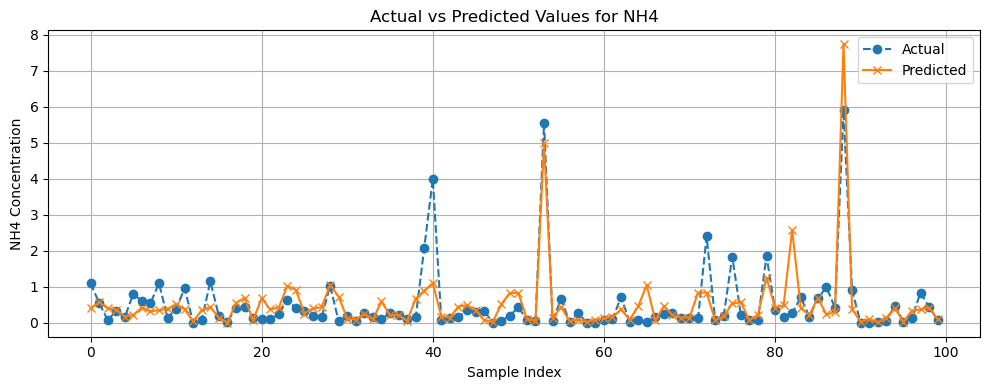

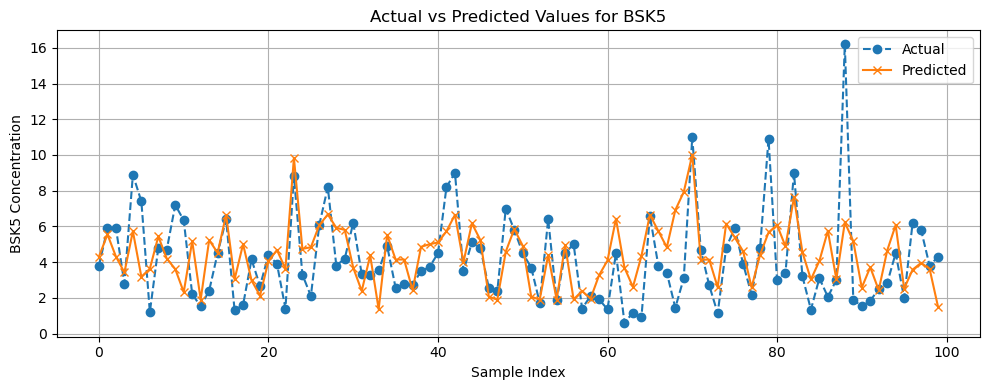

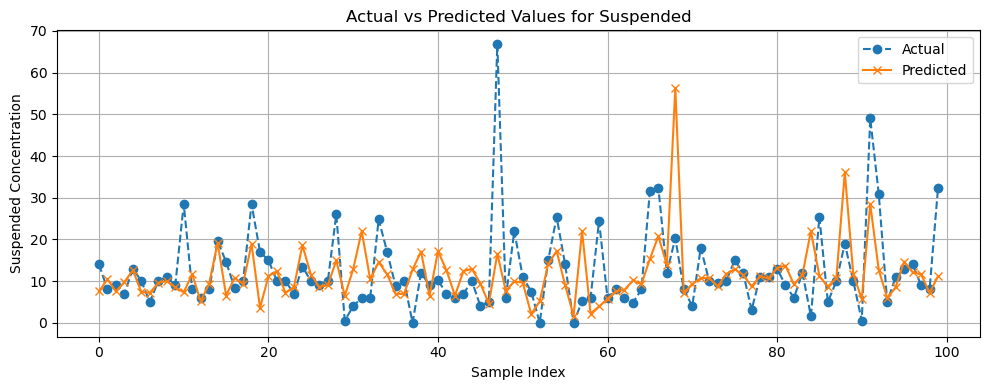

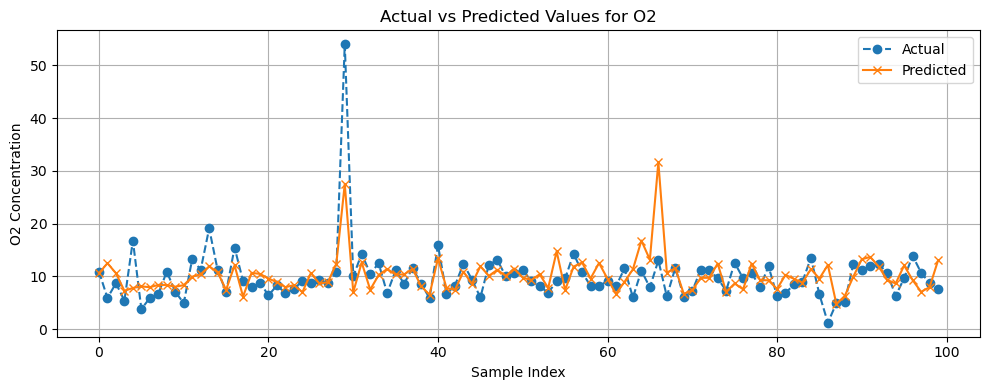

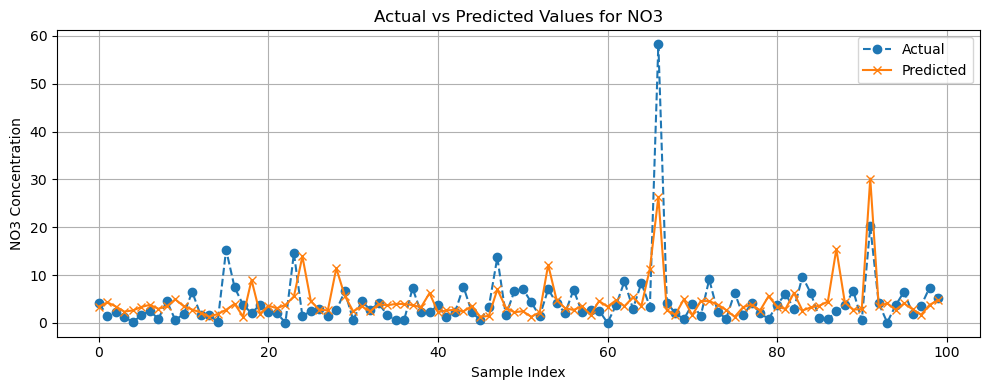

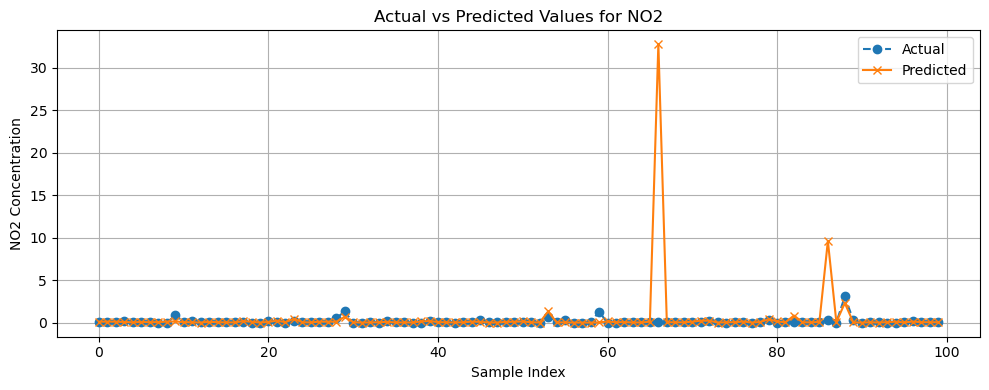

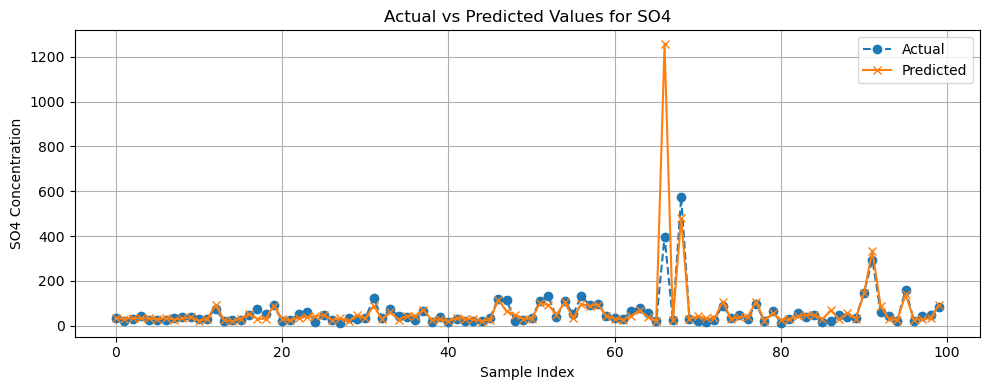

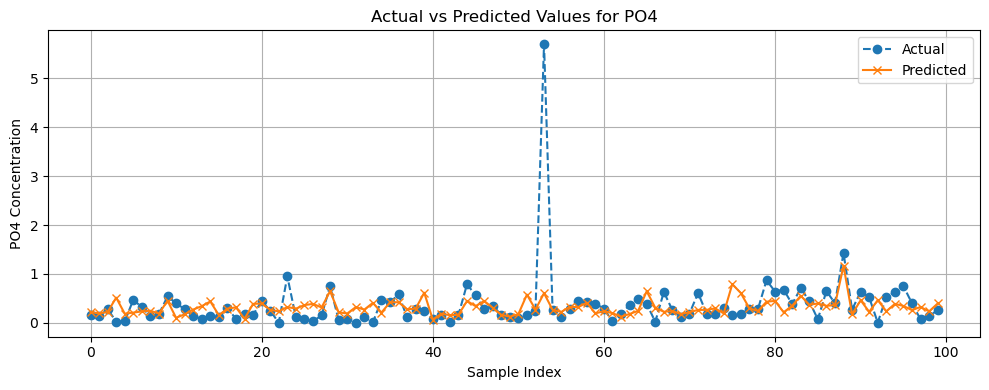

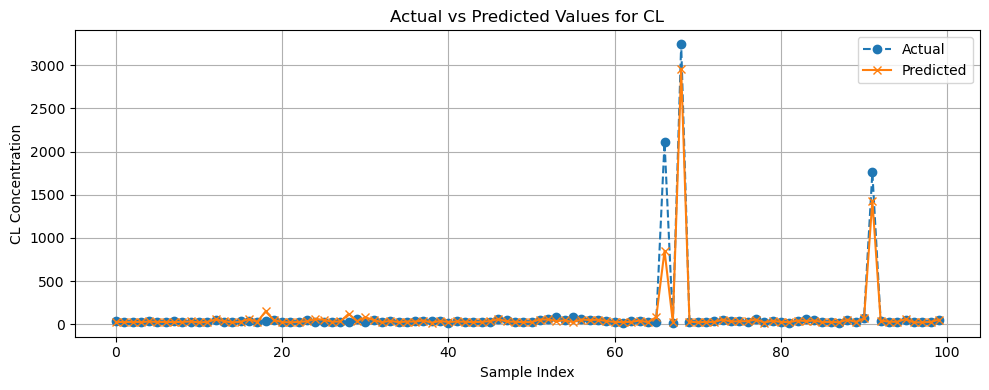

In [42]:
## Visual comparisons between actual and predicted pollutant levels
import pandas as pd
# Convert to DataFrame if needed
y_pred_df = pd.DataFrame(y_pred, columns=pollutants, index=y_test.index)

# Plot for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(10, 4))
    plt.plot(y_test[pollutant].values[:100], label='Actual', marker='o', linestyle='--')
    plt.plot(y_pred_df[pollutant].values[:100], label='Predicted', marker='x', linestyle='-')
    plt.title(f'Actual vs Predicted Values for {pollutant}')
    plt.xlabel('Sample Index')
    plt.ylabel(f'{pollutant} Concentration')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 7. Forecasting Pollutant Levels for a Selected Station and Year

This section allows users to forecast pollutant levels for a specific monitoring station and a chosen year using the trained model. It includes:

- Accepting user inputs (station ID and year)
- Encoding and aligning features with the model's training structure
- Predicting pollutant concentrations using the Random Forest model
- Visualizing how pollutant levels are expected to change over time for each parameter

**Use Case:**  
This feature enables stakeholders to make station-specific pollution forecasts and visualize long-term pollution trends, aiding decision-making for local water management policies.


In [43]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2024:
  NH4: 0.03
  BSK5: 2.57
  Suspended: 5.69
  O2: 13.25
  NO3: 6.93
  NO2: 0.07
  SO4: 144.84
  PO4: 0.46
  CL: 67.36


# 8. Water Safety Classification

We classify the predicted values into 'Safe' or 'Unsafe' based on standard environmental pollutant limits.
- Threshold-based classification using WHO/environmental guidelines
- Tag water quality status for further use

In [44]:

# Define full list of columns matching your model predictions
all_pollutants = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

# Create DataFrame from y_pred with all columns
prediction_df = pd.DataFrame(y_pred, columns=all_pollutants)

# Add year info back
prediction_df['year'] = X_test['year'].values
pred_df = prediction_df.sort_values(by=['year'])

# Define essential safety limits (WHO / BIS / EPA thresholds)
essential_limits = {
    'NH4': 0.5,         # Ammonium
    'BSK5': 3.0,        # Biological Oxygen Demand (BOD)
    'Suspended': 25.0,  # Suspended Solids
    'NO3': 10.0,        # Nitrate
    'NO2': 0.1          # Nitrite
}

# Optional: Add oxygen check if available
optional_limits = {
    'O2': 5.0  # Safe if O₂ > 5 mg/L
}

# Safe-to-drink check function
def check_safe(row):
    # Check essential limits (NH4, BSK5, Suspended, NO3, NO2)
    for param in essential_limits:
        if row[param] > essential_limits[param]:
            return False
    # Check oxygen: must be ABOVE minimum
    if row['O2'] < optional_limits['O2']:
        return False
    return True

# Apply to each row
prediction_df['Safe_to_Drink'] = prediction_df.apply(check_safe, axis=1)

# Export predictions
prediction_df.to_csv("predicted_water_quality_essential.csv", index=False)

# Export unsafe predictions only
prediction_df[~prediction_df['Safe_to_Drink']].to_csv("unsafe_samples_essential.csv", index=False)

# Summary
print("Safe samples:", prediction_df['Safe_to_Drink'].sum(), "/", len(pred_df))


Safe samples: 149 / 556


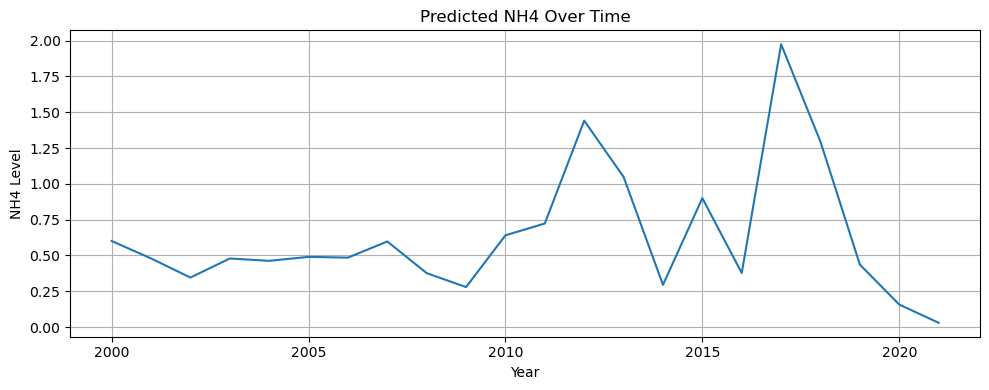

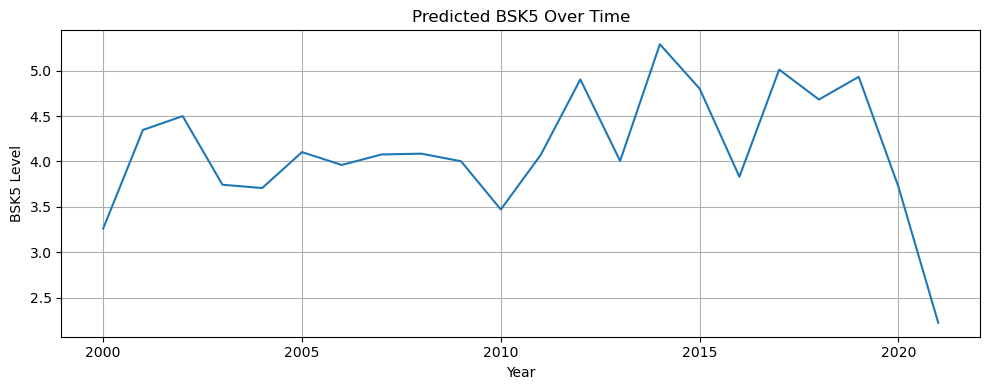

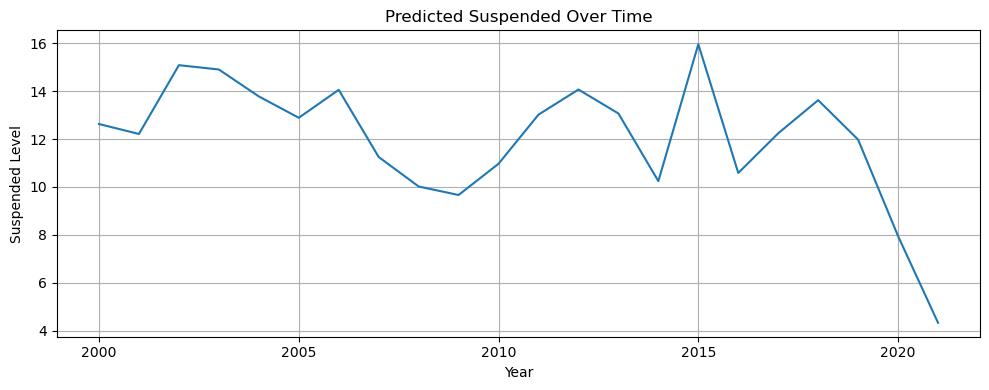

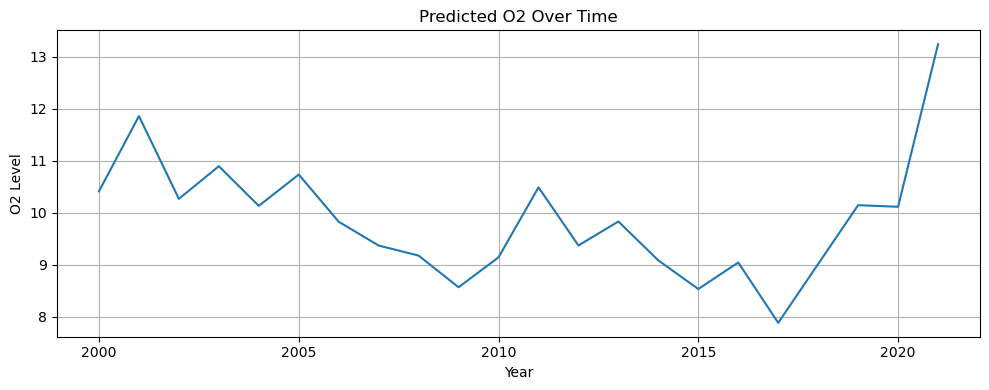

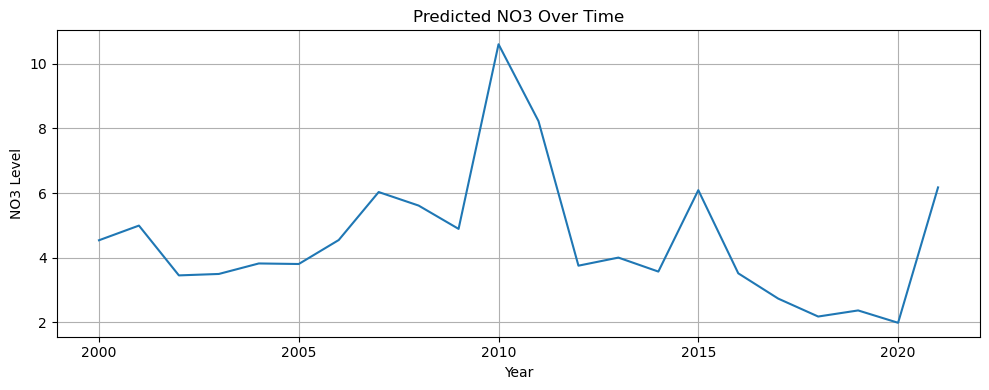

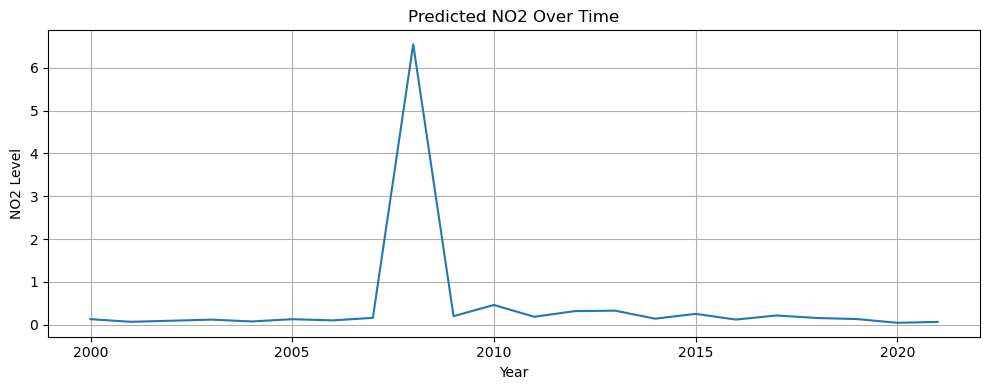

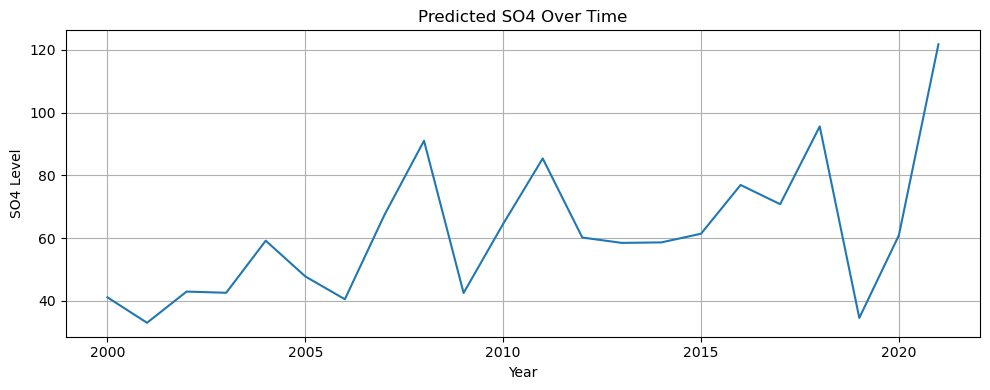

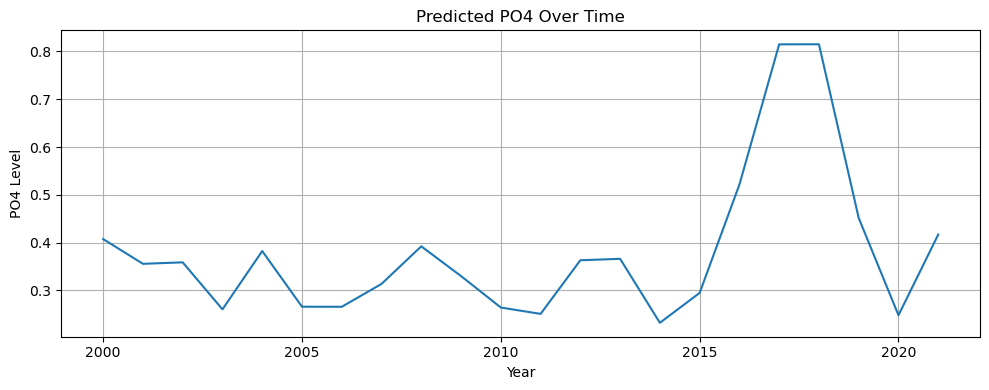

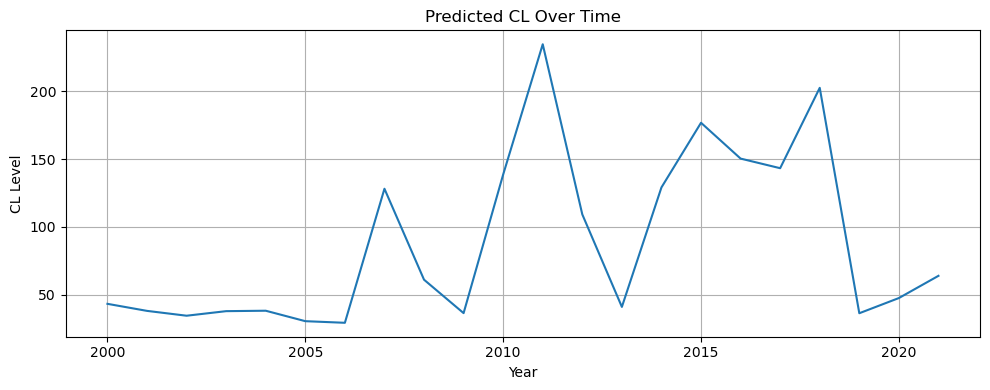

In [45]:

# Visualize changes over time per pollutant
for pollutant in pollutants:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=pred_df, x='year', y=pollutant, errorbar=None)
    plt.title(f"Predicted {pollutant} Over Time")
    plt.ylabel(f"{pollutant} Level")
    plt.xlabel("Year")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 9. Save Predictions and Results
In this section, we store the prediction outputs in CSV format for external analysis and dashboard integration.

In [46]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!
